In [35]:
#In questo script voglio calcolare queste cose per ogni soggetto:

# - Numero medio di box prese nei trial lunghi
# - Numero medio di box prese nei trial corti
# - Tempo medio presa prima cassa seconda area nei trial lunghi
# - Tempo medio presa prima cassa seconda area nei trial corti

In [36]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [37]:
data = pd.read_csv('out/results.csv')  # read data

In [41]:
unique_participant_codes = data["SubjectCode"].unique()

means = []
results = []

for participant_code in unique_participant_codes:

    condition1 = (data["SubjectCode"] == participant_code) & (data["LongBattery"] == True)
    data1 = data[condition1]

    condition2 = (data["SubjectCode"] == participant_code) & (data["LongBattery"] == False)
    data2 = data[condition2]
    
    conditiontime1 = (data["SubjectCode"] == participant_code)& (data["LongBattery"] == True)
    datatime1 = data[conditiontime1]

    conditiontime2 = (data["SubjectCode"] == participant_code) & (data["LongBattery"] == False)
    datatime2 = data[conditiontime2]

    conditiontime3 = (data["SubjectCode"] == participant_code)& (data["LongBattery"] == True)
    datatime3 = data[conditiontime3]

    conditiontime4 = (data["SubjectCode"] == participant_code) & (data["LongBattery"] == False)
    datatime4 = data[conditiontime4]


    boxopenedpertrial_longbattery = data1["BoxOpenedPerTrial"].to_numpy()
    boxopenedpertrial_shortbattery = data2["BoxOpenedPerTrial"].to_numpy()
    timetoexitfirstareaandtakeboxinthesecond_longbattery = datatime1["TimeToExitFirstAreaAndTakeABoxInTheSecond"].to_numpy()
    timetoexitfirstareaandtakeboxinthesecond_shortbattery = datatime2["TimeToExitFirstAreaAndTakeABoxInTheSecond"].to_numpy()
    timetoexitfirstarea_longbattery = datatime3["LastToMarginTime"].to_numpy()
    timetoexitfirstarea_shortbattery = datatime4["LastToMarginTime"].to_numpy()



    boxopenedpertrial_longbattery_mean = boxopenedpertrial_longbattery.mean()
    boxopenedpertrial_shortbattery_mean = boxopenedpertrial_shortbattery.mean()
    timetoexitfirstareaandtakeboxinthesecond_longbattery_mean = timetoexitfirstareaandtakeboxinthesecond_longbattery.mean()
    timetoexitfirstareaandtakeboxinthesecond_shortbattery_mean = timetoexitfirstareaandtakeboxinthesecond_shortbattery.mean()
    timetoexitfirstarea_longbattery_mean = timetoexitfirstarea_longbattery.mean()
    timetoexitfirstarea_shortbattery_mean = timetoexitfirstarea_shortbattery.mean()


    
    means.append(boxopenedpertrial_longbattery_mean)
    means.append(boxopenedpertrial_shortbattery_mean)
    means.append(timetoexitfirstareaandtakeboxinthesecond_longbattery_mean)
    means.append(timetoexitfirstareaandtakeboxinthesecond_shortbattery_mean)
    means.append(timetoexitfirstarea_longbattery_mean)
    means.append(timetoexitfirstarea_shortbattery_mean)



        # Qui vado ad aggiungere i dati del trial corrente alla lista results inizializzata all'inizio
    results.append({
        "Subject Code": participant_code, 
        "Box Opened Per Trial Mean - Long Battery": boxopenedpertrial_longbattery_mean,
        "Box Opened Per Trial Mean - Short Battery": boxopenedpertrial_shortbattery_mean,
        "TimeToExitFirstAreaAndTakeABoxInTheSecond - Long Battery": timetoexitfirstareaandtakeboxinthesecond_longbattery_mean,
        "TimeToExitFirstAreaAndTakeABoxInTheSecond - Short Battery": timetoexitfirstareaandtakeboxinthesecond_shortbattery_mean,
        "TimeToExitFirstArea - Long Battery": timetoexitfirstarea_longbattery_mean,
        "TimeToExitFirstArea - Short Battery": timetoexitfirstarea_shortbattery_mean,
        })  



# Creo un df (dataframe) dove metto i results - uso pandas as pd qui!!
dataframe = pd.DataFrame(results)

# Esporto il df in un file Excel
excel_file = "out/singlesubjectanalysis.xlsx"
dataframe.to_excel(excel_file, index=False)

# Esporto il df in un file CSV (.csv)
csv_file = "out/singlesubjectanalysis.csv"
dataframe.to_csv(csv_file, index=False)

print(f"Dati esportati in {excel_file} e {csv_file}")


Dati esportati in out/singlesubjectanalysis.xlsx e out/singlesubjectanalysis.csv


(array([0., 0., 0., 2., 6., 4., 3., 1., 2.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

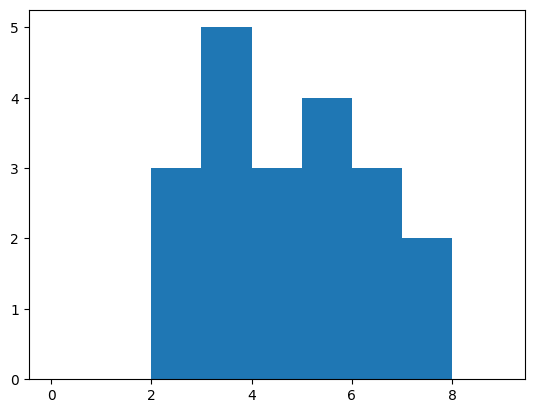

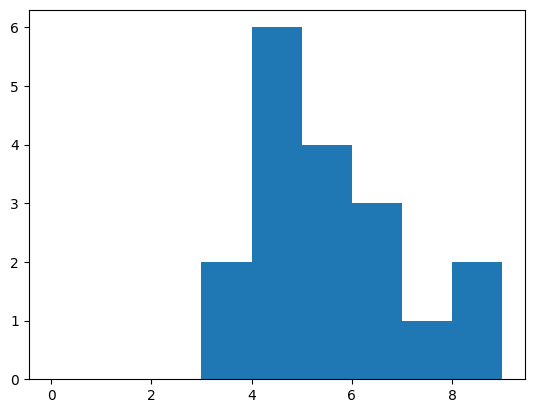

In [7]:
plt.figure()
plt.hist(timetoexitfirstareaandtakeboxinthesecond_longbattery,np.arange(10))

plt.figure()
plt.hist(timetoexitfirstareaandtakeboxinthesecond_shortbattery,np.arange(10))

Text(0.5, 1.0, 'Time to exit and take the first box in the second area')

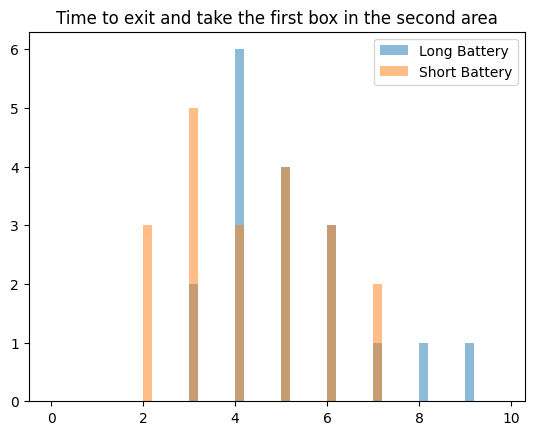

In [15]:
plt.figure()
plt.hist(timetoexitfirstareaandtakeboxinthesecond_longbattery,np.arange(0,10,0.2), alpha = 0.5)
plt.hist(timetoexitfirstareaandtakeboxinthesecond_shortbattery,np.arange(0,10,0.2), alpha = 0.5)
plt.legend(['Long Battery','Short Battery'])
plt.title('Time to exit and take the first box in the second area')

In [44]:
results = []
t_stat, p_value = stats.ttest_ind(timetoexitfirstareaandtakeboxinthesecond_longbattery, timetoexitfirstareaandtakeboxinthesecond_shortbattery)
results.append(["Long battery conditions", t_stat, p_value, "Significant difference" if p_value < 0.05 else "Non significant difference"])

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

# Create a DataFrame to store the results
columns = ["Test", "Statistic", "P-Value", "Significance"]
results_df = pd.DataFrame(results, columns=columns)

# Save the results to a CSV file
results_df.to_csv('TimeToExitFirstAreaAndTakeBoxInTheSecond_ttestresults.csv', index=False)

print("Results saved to 'TimeToExitFirstAreaAndTakeBoxInTheSecond_ttestresults.csv'.")
print(results)

Differenza significativa
Results saved to 'TimeToExitFirstAreaAndTakeBoxInTheSecond_ttestresults.csv'.
[['Long battery conditions', 2.171511666577102, 0.03620303375156274, 'Significant difference']]
